# Explainable AI Assignment
This is a template for Assignment 2 of Machine Learning Bootcamp. Please make sure you perform all tasks within the sections created. This ensures that your assignment is evaluated correctly. 

If you want to do something extra and show us your creativity, we have also created a space for it at the end!

# Task 1

## Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shap

## Load the data
Display the first 5 rows of the data after loading.

In [ ]:
heart_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/Heart_Disease/Training_set_heart.csv" )
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,48,1,2,124,255,1,1,175,0,0.0,2,2,2,1
1,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
2,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
3,60,1,0,130,253,0,1,144,1,1.4,2,1,3,0
4,43,1,0,115,303,0,1,181,0,1.2,1,0,2,1


## Perform Basic Exploratory Data Analysis

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       212 non-null    int64  
 1   sex       212 non-null    int64  
 2   cp        212 non-null    int64  
 3   trestbps  212 non-null    int64  
 4   chol      212 non-null    int64  
 5   fbs       212 non-null    int64  
 6   restecg   212 non-null    int64  
 7   thalach   212 non-null    int64  
 8   exang     212 non-null    int64  
 9   oldpeak   212 non-null    float64
 10  slope     212 non-null    int64  
 11  ca        212 non-null    int64  
 12  thal      212 non-null    int64  
 13  target    212 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 23.3 KB


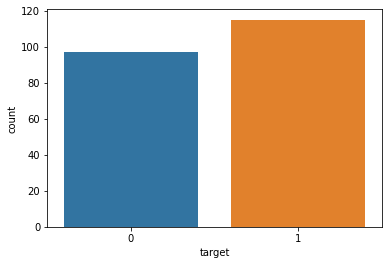

In [ ]:
sns.countplot(x='target', data=heart_data)

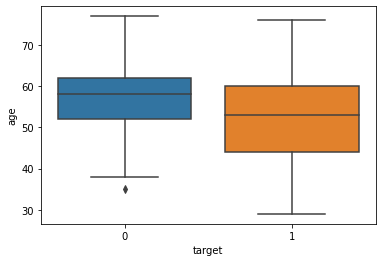

In [ ]:
sns.boxplot(x='target',y='age', data=heart_data)

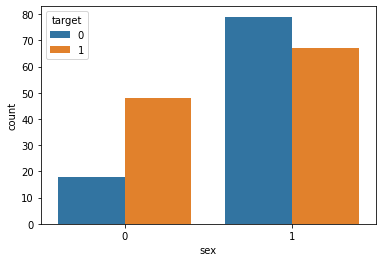

In [ ]:
sns.countplot(x='sex', hue='target', data=heart_data)

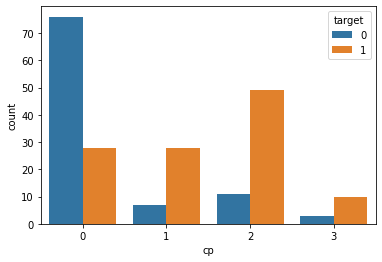

In [ ]:
sns.countplot(x='cp', hue='target', data=heart_data)

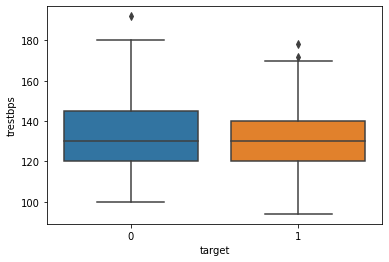

In [ ]:
sns.boxplot(x='target',y='trestbps', data=heart_data)

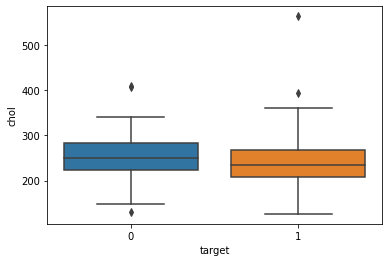

In [ ]:
sns.boxplot(x='target',y='chol', data=heart_data)

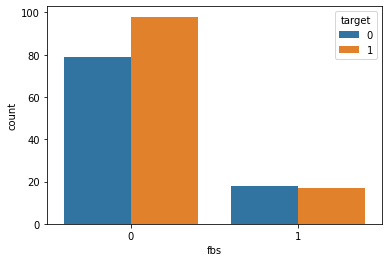

In [ ]:
sns.countplot(x='fbs', hue='target', data=heart_data)

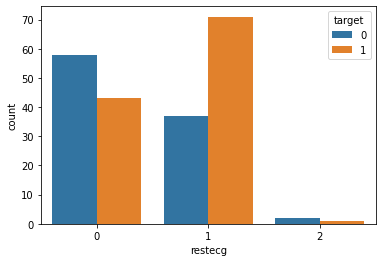

In [ ]:
sns.countplot(x='restecg', hue='target', data=heart_data)

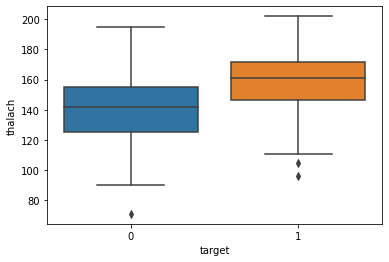

In [ ]:
sns.boxplot(x='target',y='thalach', data=heart_data)

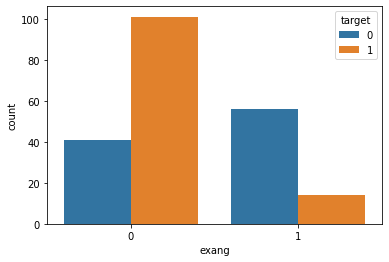

In [ ]:
sns.countplot(x='exang', hue='target', data=heart_data)

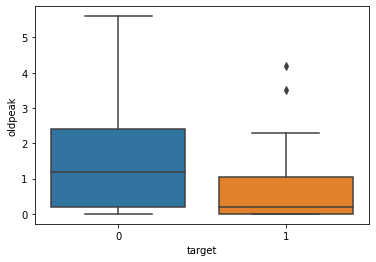

In [ ]:
sns.boxplot(x='target',y='oldpeak', data=heart_data)

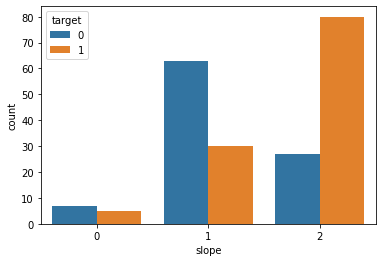

In [ ]:
sns.countplot(x='slope', hue='target', data=heart_data)

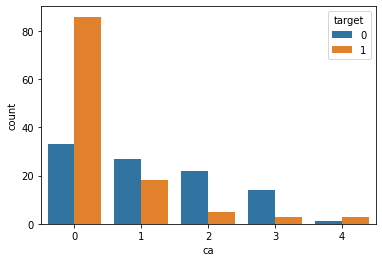

In [ ]:
sns.countplot(x='ca', hue='target', data=heart_data)

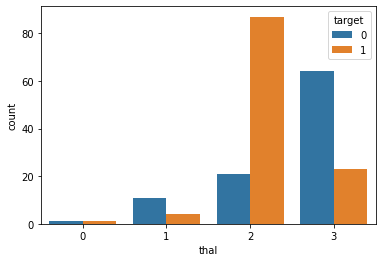

In [ ]:
sns.countplot(x='thal', hue='target', data=heart_data)

## Separate the Input and Target Features of the data

In [ ]:
X = heart_data.drop('target', axis=1)
y = heart_data['target']

## Split the data into Train and Test Sets
The train to test ratio should be 80:20 and the random_state should be 0.


In [ ]:
from sklearn.model_selection import train_test_split as splitter

X_train, X_test, y_train ,y_test = splitter(X, y, test_size=.2, random_state=0)

In [ ]:
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)

## Scale your data if required

# Task 2

## Build a Logistic Regression Model on train set

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(random_state=0)
log_model.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Evaluate the model using F1 Score

In [ ]:
from sklearn.metrics import f1_score

f1_score(y_train, log_model.predict(X_train)), f1_score(y_test, log_model.predict(X_test))

(0.8602150537634408, 0.8627450980392156)

# Task 3

##  Use a SHAP Explainer to derive SHAP Values for the logistic regression model.

The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, or maskers.Impute)


Base value: 0.30566562522804197


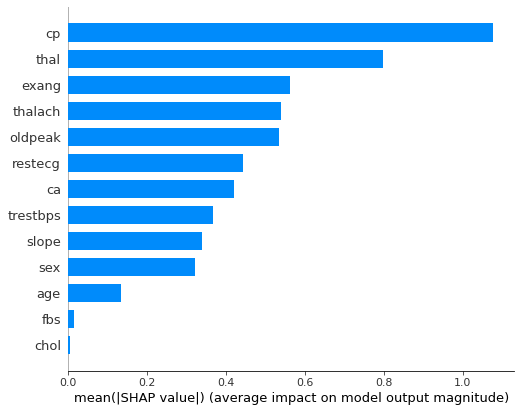

In [ ]:
explainer = shap.LinearExplainer(log_model, X_train)
shap_values = explainer.shap_values(X_test)
print(f'Base value: {explainer.expected_value}')
shap.summary_plot(shap_values, X_test, plot_type='bar')

## Write your inferences from the generated plot.

The Expected value is 0.3057. This value being displayed as base value. Higher than this value will be predicted as class 1 (heart disease present) and lower than this value will be predicted as class 0 (heart disease not present)

From Logistic model explains that top 5 features that impact the prediction are:
1. Chest pain type
2. Blood flow
3. Angina during exercise
4. Maximum heart rate
5. ST depression

# Task 4

## Plot a SHAP force plot for the first row of test data.

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

## Write your inferences from the generated plot.

First sample is predicted to be heart disease present because
1. He has Chest pain type 2
2. Resting electrocardiographic at low level
3. High maximum heart rate
4. No angina caused by exercise
5. ST depression at low level
6. No major vessels colored by fluoroscopy


# Task 5

## Plot a SHAP force plot for all the rows of the data

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_test)

## Write your inferences from the generated plot.

1. Most of pepole with no chest pain probably not have heart and the rest probably have heart disease since thet have chest pain.
2. If reversible defect found, then no heart disease is present
3. People with no exercise-included angina and high maximum rate have lower has high chance to have heart disease

# Task 6

## Plot a SHAP summary plot using all the features in the data

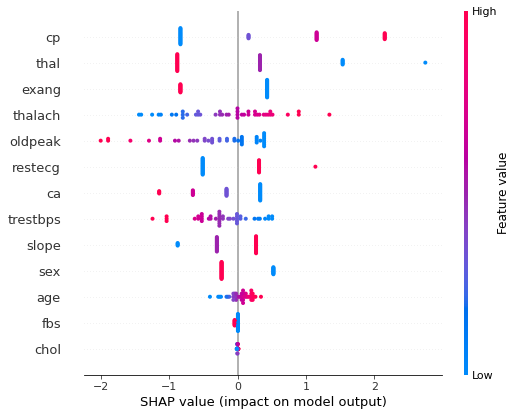

In [ ]:
shap.summary_plot(shap_values, X_test)

## Write your inferences from the generated plot.

1. Chest pain type level is the most impacful to predict presence of heart disease with lowest level has no heart disease
2. If fixed defect is found, then more likely to have heart disease, event if blood flow is normal
3. Higher Maximum heart rate, then higher impact to have heart disease
4. Low level of ST depression make impact to have heart disease higher
5. If ECG result is low then low impact to have heart disease
6. if no major vessels is colored by fluoroscopy, then more impact to have heart disease

# Task 7

## Plot a dependence plot to show the effect of ‘chol’ across the whole dataset.

In [ ]:
shap.initjs()
shap.dependence_plot(ind='chol', interaction_index='chol',
                     shap_values=shap_values, 
                     features=X_test)

## Write your inferences from the generated plot.

People with higher level of serum cholesterol have higher impact of shap value

# Task 8 (Optional)

## Do anything and everything with SHAP
This is the section to explore what more you can do with SHAP. Create some meaningful visualisations and write down what you can infer from them. 

Who knows, this section might carry some bonus points.

In [ ]:
shap.initjs()
shap.dependence_plot(ind='cp', interaction_index='cp',
                     shap_values=shap_values, 
                     features=X_test)

In [ ]:
shap.initjs()
shap.dependence_plot(ind='thal', interaction_index='thal',
                     shap_values=shap_values, 
                     features=X_test)

In [ ]:
shap.initjs()
shap.dependence_plot(ind='exang', interaction_index='exang',
                     shap_values=shap_values, 
                     features=X_test)

In [ ]:
shap.initjs()
shap.dependence_plot(ind='thalach', interaction_index='thalach',
                     shap_values=shap_values, 
                     features=X_test)

In [ ]:
shap.initjs()
shap.dependence_plot(ind='oldpeak', interaction_index='oldpeak',
                     shap_values=shap_values, 
                     features=X_test)

In [ ]:
shap.initjs()
shap.dependence_plot(ind='restecg', interaction_index='restecg',
                     shap_values=shap_values, 
                     features=X_test)

To make shap value lower so model will predict as safe from heart disease, several condition must be met:
1. No chest pain
2. Reversible defect
3. Have Exercise-induced angina
4. Lower Maximum heart rate
5. Higher ST depression
6. Zero ECG result

That is the end of this assignment. We hope you learnt a lot along the way. 
Make sure you complete the other 2 parts (leaderboard submission and quiz) as well.

Now, rename this file as **firstname_lastname_XAI.ipynb**, Download it and submit it on the platform. 